---
title: "R Notebook"
output:
  pdf_document: default
  html_notebook: default
---
# **Bloom Filters**
##### Proyecto: _Análisis probabilístico de algoritmos y algoritmos aleatorios_
###### De: _Jhonny Stuart Lorenzo Rojas_

## **1. Definiciones previas**
### **1.1. Falso positivo y falso negativo**
#### **1.1.1. Falso positivo**
Un falso positivo, coloquialmente llamado **"falsa alarma"**, es un resultado que indica que existe una condición dada, cuando en realidad no existe. Es decir, es un error en el que la prueba verifica una sola condición y erróneamente da una decisión afirmativa (**positiva**).  
**Ejm. 1.** *Cuando un **Software Antivirus** detecta un archivo normal como si fuera un virus.*   
**Ejm. 2.** *En pruebas medícas, que el resultado del diagnóstico para una enfermedad como el cancer resulte positivo, cuando realmente es negativo.*

#### **1.1.2. Falso negativo**
Un falso negativo, conocido como **error falso negativo**, es un resultado de prueba que indica que una condición no se cumple, mientras que de hecho si se cumple. En otras palabras, erróneamente no se ha inferido ningún efecto.  
**Ejm. 1.** *Tenemos una prueba que indica que una mujer **no está embarazada** mientras que ella **realmente** lo está.*  
**Ejm. 2.** *En un juicio, un prisionero **verdaderamente culpable** que **es absuelto** de un crimen.*  

¿Está claro hasta aquí?. Pues, de no estar claro, daremos un ejemplo más amplio.
##### Ejemplo
*Carolina afirma que siente comezón y cree tener alergia de algún tipo. Existe una prueba para la alergia, pero esta prueba no siempre es correcta y veremos el porqué:

1. Para las personas que **realmente** tienen dicha alergia, la prueba resulta "Si" el **80%** de las veces.
2. Para las personas que **no tienen** la alergia, la prueba resulta "Si" el **10%** de las veces.

Veamos las distintas situaciones en la siguiente tabla:

|                 | La prueba resulta "Si" | La prueba resulta "No" |
|:----------------|:----------------------:|:----------------------:|
|**Tener alergia**|           80%          |20% (**falso negativo**)|
|**No lo tenerla**|10% (**falso positivo**)|           90%          |

#### Adicional
En el ejemplo anterior, qué pasaría si el 1% de la población tiene esta alergia y la prueba de Carolina resulta "Si". En este caso, ¿cuál es la probabilidad de que Carolina realmente tenga la alergia?

Para resolver esta duda emplearemos el **Teorema de Bayes**, entonces:  

$$P(A | B) = \frac{P(A)P(B | A)}{(P(A)P(B | A)+P(\neg A)P(B | \neg A)}$$

* $P$ significa _"Probabilidad de"  
* $A|B$ significa _"A dado que ocurrió B"_  
* $A$ = {"en realidad tiene la alergia"}  
* $B$ = {"La prueba resulta **Si**"}  
* $\neg A$ = {"en realidad **no** tiene la alergia"}  

Donde:  
* $P(A)$ significa _"La probabilidad de que en realidad tiene la alergia"_, el cual es igual a $0.01$.  
* $P(\neg A)$ significa _"La prueba resulta **Si**"_, el cual es igual a $0.99$.  
* $P(A|B)$ significa _"La probabilidad de que Carolina realmente **tenga** la alergia dado que la prueba resulta **Si** "_, el cual es igual a $0.8$.  
* $P(B|\neg A)$ significa _"La probabilidad de que la prueba resulte **Si** dado que Carolina realmente **no** tiene la alergia"_, el cual es igual a $0.1$.  

Calculamos:  
$$P(A | B) = \frac{(0.01)(0.8)}{(0.01)(0.8) + (0.99)(0.1)} = 0.0748$$

Por lo tanto, la probabilidad de que Carolina tenga la alergia es del 7.48%, a pesar que la prueba resulte **"Si"**.

## **2. Bloom Filter: Una estructura de datos compacta**
Bloom Filter es una estructura de datos compacta para representar probabilísticamente un conjunto para admitir consultas de la presencia de elementos sobre un conjunto. Para ello, emplean funciones hash. Cuando se agrega un nuevo elemento, su valor hash se compara con el de otros elementos del conjunto.

[//]: # (falta aclarar más)
Esta representación compacta es la recompensa por admitir una pequeña tasa de falsos negativos en las consultas de existencia, es decir, las consultas pueden reconocer incorrectamente un elemento como si se encontrara en el conjunto. Es por esto que, el Bloom Filter se emplea para comprobar si un elemento no está presente, ya que no garantiza falsos negativos. Esto le permite no realizar trabajos adicionales para elementos que no existen en un conjunto.  

A continuación, daremos una descripción más detallada...

### Construyendo
Consideremos un conjunto $A = \{ a_{1},a_{2}, ...,a_{n} \}$ de $n$ elementos. Bloom filters describe información de pertenencia de $A$ utilizando un vector $V$ de tamaño $m$. Para esto, tenemos $k$ funciones hash, $h_{1},h_{2}, ...,h_{k}$ con $h_{i}: X \rightarrow \{1..m\}$, se usan como se describe a continuación:  
El siguiente procedimiento crea un Bloom filters de $m$ bits, que corresponde a un conjunto de A y utiliza las $k$ funciones hash $h_{1},h_{2}, ...,h_{k}$:

> **Procedimiento** BloomFilter(Conjunto: A, funcion_hash, Entero: m)  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**retorna** filtro  
    &nbsp;&nbsp;&nbsp;&nbsp;filtro = asigna $m$ bits inicializados en 0  
    &nbsp;&nbsp;&nbsp;&nbsp;**para cada** $a_{i}$ en $A$ :  
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**para cada** funcion_hash $h_{j}$ :  
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;filtro[$h_{j}(a_{i})$] = $1$  
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**fin para cada**  
    &nbsp;&nbsp;&nbsp;&nbsp;**fin para cada**  
&nbsp;&nbsp;&nbsp;&nbsp;**retorna** filtro

En consecuencia, si $a_{i}$ es está en $A$, en el Bloom filter $V$ resultante todos los bits obtenidos correspondientes a los valores hasheados de $a_{i}$ su valor es $1$. La prueba de pertenenecia a un elemento $elem$ es equivalente a probar que todos los bits correspondientes de $V$ son el conjunto:

> **Procedimiento** PruebaElemEsta(elem, filtro, funcion_hash)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**retorna** si/no  
&nbsp;&nbsp;&nbsp;&nbsp;**para cada** funcion_hash $h_{j}$ :   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**si** filtro[$h_{j}(elem)$] = $1$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;retorna no  
&nbsp;&nbsp;&nbsp;&nbsp;**fin para cada**  
&nbsp;&nbsp;&nbsp;&nbsp;**retorna** yes  

### Sustento matemático
Previamente se explico que una de las características era la compensación entre el tamaño del filtro y la tasa de falsos positivos. Observemos que después de ingresar $n$ claves en un filtro de tamaño $m$ usando $k$ funciones hash, la probabilidad de que un bit en particular aún sea $0$ es:

$p_{0} = ({1- \frac{1}{m}})^{kn} \approx e^{-\frac{kn}{m}}$  ... (1)

Tenga en cuenta que suponemos funciones hash perfectas que separan los elementos de $A$ uniformemente en todo el espacio $\{1..m\}$.

Por lo tanto, la probabilidad de un falso positivo (la probabilidad de que todos los $k$ bits se hayan establecido previamente) es:  

$p_{err} = {(1 - p_{0})}^k = {(1 - ({1- \frac{1}{m}})^{kn})}^k \approx {(1 - e^{-\frac{kn}{m}})}^k  = {(1 - p_{0})}^k$  ... (2)

De ahora en adelante. por conveniencia usamos las aproximaciones asintóticas $p_{err}$ y $p_{0}$ para representar (respectivamente) la probabilidad de que un bit en el filtro Bloom sea 0 y la probabilidad de un falso positivo.

Supongamos que se nos da $m$ y $n$ y deseamos optimizar el número de funciones hash $k$ para minimizar la probabilidad del falso positivo $p_{err}$.

Hay dos ideas que compiten: Usar más funciones hash nos da más oportunidades de encontrar un $0$ para un elemento que no es miembro de $A$, pero usar menos funciones hash aumenta la fracción de $0$ en el conjunto.

El número óptimo de funciones hash que minimiza f en función de k se encuentra fácilmente tomando la derivada. Entonces:
Sea $g(k) = kln(1 - e^{-\frac{kn}{m}})$ , donde $p_{err} = e^{g(k)}$ y minimizar el falso positivo de $p_{err}$ es equivalente a minimizar $g(k)$ respecto de $k$, entonces:  

$\frac{dg(k)}{dk} = ln(1 - e^{-\frac{kn}{m}}) + \frac{kn}{m}\frac{e^{-\frac{kn}{m}}}{(1 - e^{-\frac{kn}{m}})}$

Realizando operaciones llegaremos a la conclusión que para $k = ln(2)\frac{m}{n}$ es el mínimo global. Por lo tanto, reemplazando este resultado en la ec.1 tendriamos que el $p_{0}$ es igual a $\frac{1}{2}$, esto último lo reemplazamos en (2) y obtenemos $p_{err}$ es igual a $(\frac{1}{2})^k \approx (0.6185)^{\frac{m}{n}}$. En ultima ecuación la emplearemos para ver como se comportan, tanto $k$ como $p_{err}$.  

Valores de k, donde k es el número de funciones hash para el Bloom Filter, con k entero:

[1] "Valores k:"


[1]  0.6931545  1.3863090  2.0794635  2.7726180  3.4657725  4.1589270
 [7]  4.8520815  5.5452360  6.2383905  6.9315450  7.6246995  8.3178540
[13]  9.0110085  9.7041630 10.3973175 11.0904720 11.7836265 12.4767810
[19] 13.1699355 13.8630900 14.5562445 15.2493990 15.9425535 16.6357080
[25] 17.3288625 18.0220170 18.7151715 19.4083260 20.1014805 20.7946350

[1] "Valores falso positivos p.err:"


[1] 6.185000e-01 3.825423e-01 2.366024e-01 1.463386e-01 9.051041e-02
 [6] 5.598069e-02 3.462405e-02 2.141498e-02 1.324516e-02 8.192134e-03
[11] 5.066835e-03 3.133837e-03 1.938278e-03 1.198825e-03 7.414734e-04
[16] 4.586013e-04 2.836449e-04 1.754344e-04 1.085062e-04 6.711106e-05
[21] 4.150819e-05 2.567281e-05 1.587864e-05 9.820936e-06 6.074249e-06
[26] 3.756923e-06 2.323657e-06 1.437182e-06 8.888969e-07 5.497828e-07

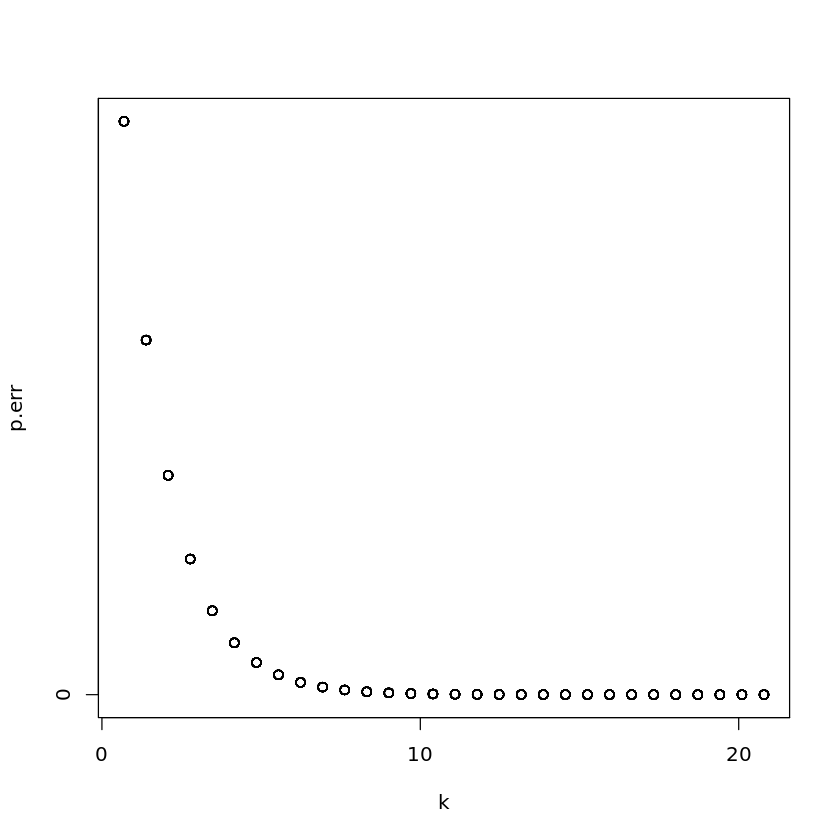

In [5]:
k <- 0
p.err <- 0
for (m.div.n in c(1:30)){  
  k[m.div.n] <- c(-log2(0.6185^(m.div.n)))
  p.err[m.div.n] <- c(0.6185^(m.div.n))
}
print("Valores k:")
k
print("Valores falso positivos p.err:")
p.err

#La grafica
plot.new()          
plot.window(range(k), range(p.err))  
axis(1, at = seq(0, 100, by = 10))                    #Crea el eje x
axis(2, at = seq(0, 120, by = 10))                   #Crea el eje y
box()                                                       #Crea una caja
for (i in c(1:45)) {
    points(k, p.err)
}
mtext("k", side=1, line=3)    #Se nombre "k" al eje x.
mtext("p.err", side=2, line=3)       #Se nombre "p.err" al eje y.
legend(5, 100, legend = c("k", "p.err"), cex = 0.8, pch = c(1,16))  #Agrega la leyenda en el gráfico.

En otras palabras, la probabilidad de falso positivo cae exponencialmente en $\frac{n}{m}$, el número de bits utilizados por elemento. Vamos a considerar que m y n son proporcional, luego veremos el porqué, veamoslo...


Ahora sustituiremos el valor optimo de $k = \frac{m}{n}ln2$ en la ec. 2:  
  
  
$p_{err} = {(1 - e^{-\frac{kn}{m}})}^k  = {(1 - e^{-\frac{{ln(2)\frac{m}{n}}n}{m}})}^{ln(2)\frac{m}{n}}$

se simplica:  
$ln(p) = -\frac{m}{n}(ln2)^2$  

Operando, encontramos que la cantidad óptima de bits por elemento es:

$\frac{m}{n} = -\frac{log_{2}(p)}{ln2} \approx -1.44log_{2}(p)$  ... (3)

Reemplazando el valor optimo de $k = \frac{m}{n}ln2$ en la ec. 3, obtenemos lo siguiente:  

$k = -\frac{lnp}{ln2} = -log_{2}(p)$  

Es decir, que la cantidad de funciones hash del Bloom Filter, solo depende de la probabilidad del falso positivo $p_{err}$.



Esto significa que para una probabilidad de falso positivo p dada , la longitud de un filtro de Bloom m es proporcional al número de elementos que se filtran ny el número requerido de funciones de dispersión solo depende de la probabilidad de falso positivo objetivo p


 En la práctica, sin embargo, solo se usa un pequeño número k de funciones hash. La razón es que la carga computacional de cada función hash adicional resulta constante, mientras que el beneficio incremental de agregar una nueva función hash disminuye después de un cierto umbral.

## **4. ¿Por qué usar Bloom Filter, y no las estructuras de datos clásicas?**
El uso de esta estructura de datos presenta una gran ventaja respecto a otras estructuras de datos como **_árboles de de búsqueda binaria autobalanceados, tries, tablas hash, array o listas enlazadas_**. La mayoría de estos requieren almacenar al menos los elementos de datos, que pueden requerir desde un pequeño número de bits, para enteros pequeños, hasta un número arbitrario de bits, tal como cadenas (**tries** son una excepción, ya que pueden compartir almacenamiento entre elementos con los mismos prefijos).  

Un filtro Bloom con un 1% de error y un valor óptimo de k, por otro lado, requiere solo alrededor de 9,6 bits por elemento, independientemente del tamaño de los elementos. Esta ventaja proviene en parte de su compacidad, heredada de las matrices, y en parte de su naturaleza probabilística. Si una tasa de 1% de falsos positivos parece demasiado alta, cada vez que agreguemos alrededor de 4,8 bits por elemento lo disminuiremos en 10 veces. 
Y todo en un espacio significativamente menor que algo así como una tabla hash (que probablemente estará parcialmente en el disco para grandes conjuntos de datos).


### **Ejemplo didáctico**
Un patrón de uso ejemplar podría ser:

Tenemos una gran cantidad de datos, en el disco: usted decide qué error enlazado desea (por ejemplo, 1%), que prescribe el valor de m. Entonces se determina la k óptima (de la fórmula dada en el artículo). Rellena el filtro de estos datos vinculados al disco una vez.

Ahora tienes el filtro en la RAM. Cuando necesite procesar algún elemento, consulte su filtro para ver si existe la posibilidad de que exista en su conjunto de datos. Si no lo hace, no se realiza ningún trabajo adicional. No se lee el disco, etc. (lo que tendrías que hacer si fuera un hash o un árbol, etc.).

De lo contrario, si el filtro dice "Sí, está ahí", hay un 1% de posibilidades de que esté mal, por lo que debe hacer el trabajo necesario para averiguarlo. 99% del tiempo, realmente estará allí, por lo que el trabajo no fue en vano.  


### **Referencias**
* Bloom Filters - Short Tutorial, Matei Ripeanu, Adriana Iamnitchi.
* Mitzenmacher, M., & Upfal, E. (2017). Probability and computing: Randomized and probabilistic techniques in algorithms and data analysis. Cambridge; New York ; Port Melbourne ; Delhi ; Singapore: Cambridge University Press.